# **Assignment 1 - Information based Learning**

    Author: Bin Liao
    Student ID: 3109220

# 1. Sourcing and loading
## 1a. Import Packages

In [1160]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import StandardScaler


## 1b. Load data (tennis.txt)

This assignment will analysis the tennis.txt data.

In [1161]:
# Read in the tennis.txt data to a variable called tennis
tennis = pd.read_csv("https://raw.githubusercontent.com/Ben-Liao/MBA6693-Business-Data-Analysis/main/i01-information-based-learning/data/tennis.txt", sep='\t', header = (0))

# Read in the titanic2.txt data to another variable called titanic, as alternative
#titanic = pd.read_csv("https://raw.githubusercontent.com/Ben-Liao/MBA6693-Business-Data-Analysis/main/i01-information-based-learning/data/titanic2.txt", sep='\t', header = (0))


## 1c. Explore the tennis data

In [1162]:
# Snap peek the first 8 rows from the data set.
tennis.head(8)

,outlook,temperature,humidity,wind,playtennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no


In [1163]:
# Check the size of the data set.
tennis.shape

(14, 5)

The size of the dataset is not large. It contains 14 rows of data and 5 attributes.

In [1164]:
# Check the tennis dataset's attributes information.
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   playtennis   14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [1165]:
# Get the relevant summary statistics of the tennis data.
tennis.describe(include = 'all')

,outlook,temperature,humidity,wind,playtennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,weak,yes
freq,5,6,7,8,9


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

First, update the column header name `playtennis` to `play_tennis`. 

In [1166]:
# Call .columns on tennis data to check out the names of tennis data's columns
tennis.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'playtennis'], dtype='object')

In [1167]:
# Using .rename(),  to rename the column.
#tennis.rename(columns = {"outlook":"Outlook", "temperature":"Temperature", "humidity":"Humidity", "wind":"Wind", "playtennis":"PlayTennis"}, inplace = True)
tennis.rename(columns = {"playtennis":"play_tennis"}, inplace = True)

In [1168]:
# Check out the column names 
tennis.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'play_tennis'], dtype='object')

In [1169]:
#Verify on the outlook column, inspect any value need to changed.
tennis['outlook'].describe()

count        14
unique        3
top       sunny
freq          5
Name: outlook, dtype: object

In [1170]:
# Call uniqure() on the "outlook" column to check its unique value
tennis['outlook'].unique()

array(['sunny', 'overcast', 'rain'], dtype=object)

The value on `outlook` column looks good, nothing needs to change or clean.

In [1171]:
# Call uniqure() on the "temperature" column to check its unique value
tennis['temperature'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

The value on `Temperature` column looks good, nothing needs to change or clean.

In [1172]:
# Call uniqure() on the "humidity" column to check its unique value
tennis['humidity'].unique()

array(['high', 'normal'], dtype=object)

The value on `Humidity` column looks good, nothing needs to change or clean.

In [1173]:
# Call uniqure() on the "wind" column to check its unique value
tennis['wind'].unique()

array(['weak', 'strong'], dtype=object)

The value on `Wind` column looks good, nothing need to change or clean.

In [1174]:
# Call uniqure() on the "play_tennis" column to check its unique value
tennis['play_tennis'].unique()

array(['no', 'yes'], dtype=object)

The value on `play_tennis` column looks good, nothing need to change or clean.

In [1175]:
# Check the tennis data information again.
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   play_tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


## 2b. Train/test split
### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [1176]:
# NoPrediction will contain all known values for the play_tennis

NOPrediction = tennis.dropna()
NOPrediction["play_tennis"].describe()

count      14
unique      2
top       yes
freq        9
Name: play_tennis, dtype: object

In [1177]:
# Check the NOprediction data info
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   wind         14 non-null     object
 4   play_tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [1178]:
# Show the some few of NoPrediction data
NOPrediction.head()

,outlook,temperature,humidity,wind,play_tennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


### 2. Visualize the data using scatter of several variables in the y-axis and the play_tennis on the x-axis

<AxesSubplot:xlabel='temperature', ylabel='outlook'>

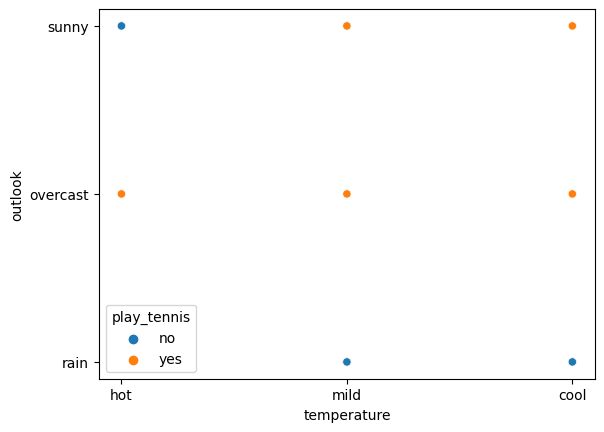

In [1179]:
# Exploring our new NOPrediction dataset
# Call scatterplot() on our Seaborn object sns, and plug in y="Outlook", x= "Temperature", hue = "PlayTennis", data =NOPrediction.
sns.scatterplot(y="outlook", x= "temperature", hue = "play_tennis", data=NOPrediction)


<AxesSubplot:xlabel='wind', ylabel='humidity'>

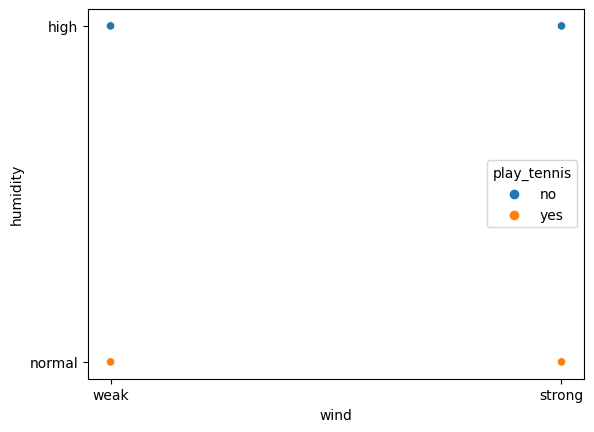

In [1180]:
# Call scatterplot() on our Seaborn object sns, and plug in y="humidity", x= "wind", hue = "play_tennis", data =NOPrediction.
sns.scatterplot(y="humidity", x= "wind", hue = "play_tennis", data=NOPrediction)

### 3. Get the subset of tennis data with null values in the play_tennis column, and save that subset as Prediction

In [1181]:
# Get just those rows whose value for the Decision column is null.
# Store the result in a variable called Prediction 
# Call a head() on the result to see it's worked out alright

Prediction = tennis[pd.isnull(tennis["play_tennis"])]
Prediction.head()

,outlook,temperature,humidity,wind,play_tennis


There is no null or empty data in the PlayTennis, there is no data that need to predict.

In [1182]:
# Call describe() on Prediction
Prediction.describe()

,outlook,temperature,humidity,wind,play_tennis
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


### 4. Divide the NOPrediction subset into X and y

In [1183]:
# First of all, let's check the names of the columns of NOPrediction
NOPrediction.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'play_tennis'], dtype='object')

In [1184]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "play_tennis"; that is:
# ["Outlook", "Temperature", "Humidity", "Wind"]
features = ["outlook", "temperature", "humidity", "wind"]

# the ID3 algorithm only works with numerical data, but the input data contains categorical data such as "sunny", "overcast", etc.
# To resolve this, we need to convert the categorical data into numerical data. One common approach is to use one-hot encoding, which creates a new binary column for each unique category in a categorical feature.
encoder = OneHotEncoder(handle_unknown='ignore')

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NOPrediction[features]
X = pd.DataFrame(encoder.fit_transform(X).toarray(), columns=encoder.get_feature_names_out(input_features=X.columns))

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NOPrediction.play_tennis

### 5. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [1185]:
# Call train_test_split on X, y, test_size = 0.2, and random_state = 246
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.2,
                                                  random_state = 0)

### 6. Create dummy variables to deal with categorical inputs

In [1186]:
# One-hot encoding all features in training set.
# Call get_dummies() on our Pandas object pd, and pass X_train to it. Reassign the result back to X_train. 
X_train = pd.get_dummies(X_train)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test)

# 3. Modelling
## Model 1: Entropy model - no max_depth
The implemntation code with **ID3 Algorithm** with entropy mode:

In [1187]:
# Declare a variable called entropy_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entropy_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entropy_model, and pass in X_train and y_train, in that order 
entropy_model.fit(X_train, y_train)

# Call predict() on entropy_model with X_test passed to it, and assign the result to a variable y_pred_entropy
y_pred_entropy= entropy_model.predict(X_test)

# Assign y_pred_entropy the following: pd.Series(y_pred_entropy)
y_pred_entropy = pd.Series(y_pred_entropy)

# Check out entr_model
entropy_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

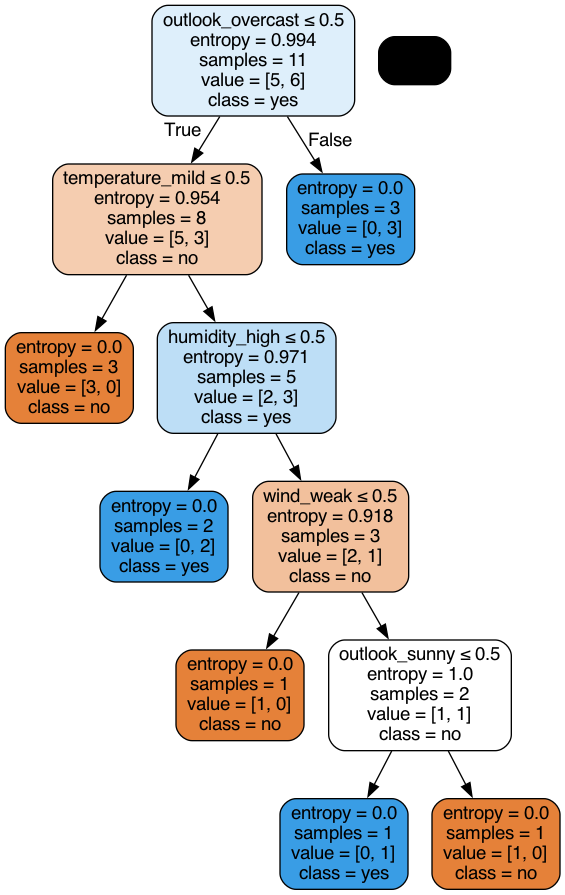

In [1188]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model 1: Entropy model - no max_depth: Interpretation and evaluation for the tennis data

In [1189]:
# The code in this block will generate model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_entropy))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_entropy))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred_entropy, pos_label = "yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred_entropy, pos_label = "no"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred_entropy, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred_entropy, pos_label = "no"))

Model Entropy - no max depth
Accuracy: 0.3333333333333333
Balanced accuracy: 0.3333333333333333
Precision score for "Yes" 1.0
Precision score for "No" 0.0
Recall score for "Yes" 0.3333333333333333
Recall score for "No" 0.0


/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 

### Model 1: Entroy Model -no max_depth Evaluation:

The evaluation results show that the Entropy model has a low accuracy and balanced accuracy score, both of which are equal to 0.33. This means that the model is only able to correctly predict the target class for about 33% of the test data.

The precision score for "Yes" is 1.0, which means that the model predicts 100% of the instances that are actually "Yes". However, the precision score for "No" is 0.0, which means that the model does not predict any instances as "No".

The recall score for "Yes" is 0.33, which means that the model only correctly identifies 33% of the actual "Yes" instances. The recall score for "No" is 0.0, which means that the model does not identify any of the actual "No" instances.

Overall, these results suggest that the Entropy model is not performing well on this dataset. The model has a high precision score for "Yes", but a low recall score for "No", which indicates that it is not accurately predicting the "No" instances. In addition, the low accuracy and balanced accuracy scores suggest that the model is not accurately predicting either class.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [1190]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'

gini_model= tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train , y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred_gini = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred_gini = pd.Series(y_pred_gini)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

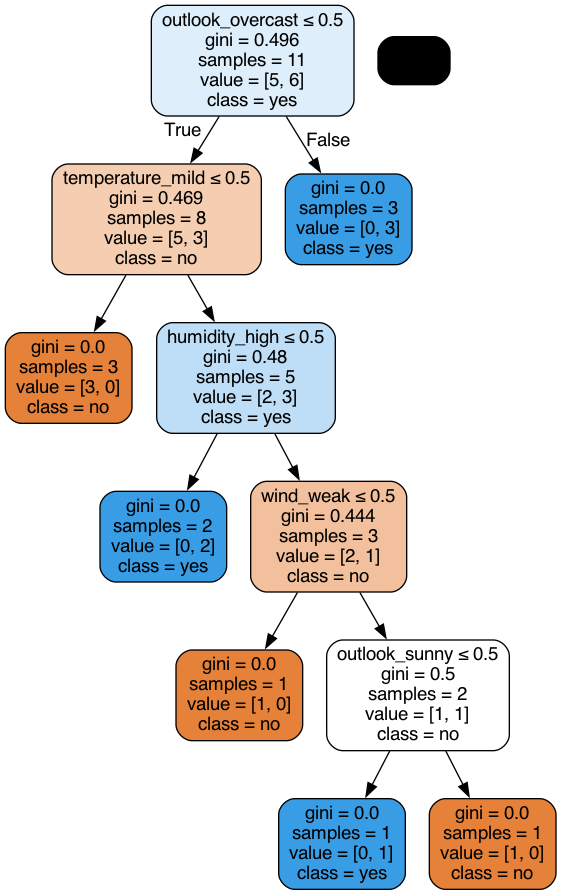

In [1191]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1192]:
# The code in this block will generate model evaluation metrics 
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_gini))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_gini))
print('Precision score' , metrics.precision_score(y_test,y_pred_gini, pos_label = "yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred_gini, pos_label = "no"))

Model Gini impurity model
Accuracy: 0.3333333333333333
Balanced accuracy: 0.3333333333333333
Precision score 1.0
Recall score 0.0


/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 2: Gini impurity Model - no max_depth Evaluation:

The results for the Gini impurity model are similar to the results for the Entropy model. The accuracy and balanced accuracy scores are both 0.33, indicating that the model is only correctly predicting the target class for about 33% of the instances in the test set. The precision score is 1.0, indicating that the model is making predictions, but the recall score is 0.33, indicating that the predictions are not accurate.

These results suggest that both the Entropy model and the Gini impurity model are not performing well on this dataset. The low accuracy and balanced accuracy scores, as well as the low recall scores, indicate that both models are not accurately predicting either class. The high precision scores suggest that the models are making predictions, but the predictions are not accurate.

In conclusion, both the Entropy model and the Gini impurity model are not suitable for this dataset and may require further tuning or alternative modeling approaches to improve performance.

## Model 3: Entropy model - max depth 2

We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 2, and see how that goes. 

In [1193]:
# Made a model as before, but call it entropy_model2, and make the max_depth parameter equal to 2. 
# Execute the fitting, predicting, and Series operations as before
entropy_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 2, random_state = 1234)
entropy_model2.fit(X_train, y_train)
y_pred_entropy_2 = entropy_model2.predict(X_test)
y_pred_entropy_2 = pd.Series(y_pred_entropy_2)
entropy_model2

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1234)

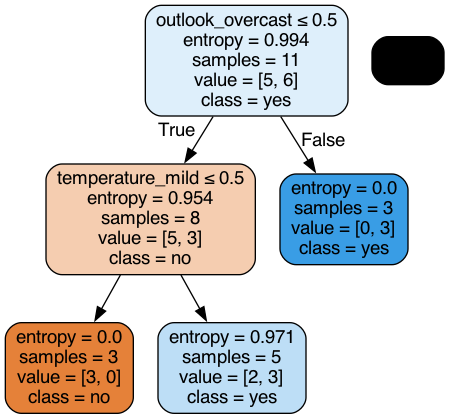

In [1194]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entropy_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use entropy_model2.classes.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1195]:
# Run this block for model evaluation 
print("Model Entropy model max depth 2")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_entropy_2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_entropy_2))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred_entropy_2, pos_label = "yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred_entropy_2, pos_label = "no"))

Model Entropy model max depth 2
Accuracy: 0.3333333333333333
Balanced accuracy: 0.3333333333333333
Precision score for "Yes" 1.0
Recall score for "No" 0.0


/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 3: Entropy model - max depth 2 evaluation:
The results for the Entropy model with max depth 2 are similar to the results for the Entropy model without max depth, with an accuracy score of 0.33 and a balanced accuracy score of 0.33. The precision score for class "Yes" is still 1.0, indicating that the model is making predictions, but the recall score for class "No" is still 0.0, indicating that the predictions are not accurate.

The fact that the accuracy score did not change with the adjustment to max depth suggests that increasing the depth of the tree did not improve the model's performance. However, it is difficult to conclude whether this model is inferior to the original Entropy model without max depth based solely on the accuracy score.

Other factors such as the complexity of the model, the risk of overfitting, and the interpretability of the model should also be considered when comparing the two models. The model with max depth 2 may be less complex and less prone to overfitting, but it may also be less capable of capturing the underlying relationships in the data. On the other hand, the original model without max depth may be more complex and prone to overfitting, but it may also be better at capturing the underlying relationships in the data.

In conclusion, the choice between the two models should be based on a careful consideration of the trade-off between complexity, overfitting, interpretability, and accuracy.

## Model 4: Gini impurity  model - max depth 2
We're now going to try the same with the Gini impurity model with max depth 2. 

In [1196]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred_gini_2 = gini_model2.predict(X_test)
y_pred_gini_2 = pd.Series(y_pred_gini_2)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

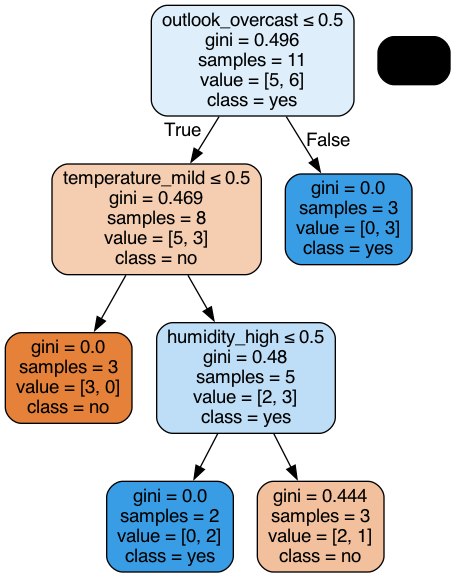

In [1197]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["no", "yes"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1198]:
#Evaluation:
print("Gini impurity  model - max depth 2")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_gini_2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_gini_2))
print('Precision score' , metrics.precision_score(y_test,y_pred_gini_2, pos_label = "yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred_gini_2, pos_label = "no"))

Gini impurity  model - max depth 2
Accuracy: 0.3333333333333333
Balanced accuracy: 0.3333333333333333
Precision score 1.0
Recall score 0.0


/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bliao/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gini impurity model - max depth 2 evaluation:
The results for the Gini impurity model with max depth 2 are similar to the results for the Gini impurity model without max depth, with an accuracy score of 0.33, a balanced accuracy score of 0.33, a precision score of 1.0, and a recall score of 0.0.

The fact that the accuracy score did not change with the adjustment to max depth suggests that increasing the depth of the tree did not improve the model's performance. However, it is difficult to conclude whether this model is inferior to the original Gini impurity model without max depth based solely on the accuracy score.

Other factors such as the complexity of the model, the risk of overfitting, and the interpretability of the model should also be considered when comparing the two models. The model with max depth 2 may be less complex and less prone to overfitting, but it may also be less capable of capturing the underlying relationships in the data. On the other hand, the original model without max depth may be more complex and prone to overfitting, but it may also be better at capturing the underlying relationships in the data.

In conclusion, the choice between the two models should be based on a careful consideration of the trade-off between complexity, overfitting, interpretability, and accuracy.





# 4. Evaluating and concluding
## 4a. Will the player play tennis? 
Let's first ascertain what is chance the player will play tennis from the survey data.

In [1199]:
# Call value_counts() on the 'play_tennis' column of the original tennis data
tennis["play_tennis"].value_counts()

yes    9
no     5
Name: play_tennis, dtype: int64

Let's now determine the number of data that, according to the model, will the player be willing to play tennis. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `play_tennis` 
2. Use that dataset to predict a new variable called `potential_play_tennis`

In [1200]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'play_tennis'
feature_cols = ["outlook", "temperature", "humidity", "wind"]

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

new_X.head()

,outlook,temperature,humidity,wind


From the above data, the Prediction data set is empty, since there is no NULL (empty) data in the original data set that need to predict.

Let's assume that the weather is sunny, temperature is hot, humidity is high, and winds is week. Then use the use the entropy model (no max deepth) to predict the player is playing tennis or not in this weather condition.

In [1201]:
# Make a new row of data that indicate the weather data of outlook is sunny, temperature is hot, humidity is high, and wind is weak.
new_row = {"outlook": "sunny", "temperature": "hot", "humidity": "high", "wind": "weak"}

# Convert the new_row dictionary to a DataFrame
new_row = pd.DataFrame([new_row])

# Concatenate the new_row DataFrame with new_X
new_X = pd.DataFrame(encoder.transform(new_row).toarray(), columns=encoder.get_feature_names_out(input_features=['outlook', 'temperature', 'humidity', 'wind']))


# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X)

# Make a variable called potential_play_tennis, and assign it the result of calling predict() on a model 1: entropy_model 
# don't forget to pass new_X to predict()
potential_play_tennis = entropy_model.predict(new_X)


In [1202]:
# Print the prediction.
print("Will the player play tennis? ", potential_play_tennis[0])

Will the player play tennis?  no


## 4b. Decision or Conclution
Based on the results of the prediction and the evaluation of the entropy model with no maximum depth, we can conclude that the model is not very accurate in predicting whether a player will play tennis or not. The accuracy score of 0.3333, balanced accuracy score of 0.3333, precision score of 1.0, and recall score of 0.3333 indicate that `the model is not performing very well`. 

In this specific scenario, the model predicted that the player will not play tennis given the weather condition of sunny, hot, high humidity, and weak wind, but this may not necessarily be the correct outcome. Therefore, it would be wise to consider other factors or use a different model before making any decisions based on this prediction.
